In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task Objectives :**

● First step is to clean data so that results are accurate and precise. EDA is an essential
part in all machine learning works to know the trend in data and features so that we can
improve model performance by choosing features according to the insights gained from
EDA.
● Post cleaning of data, perform exploratory data analysis(EDA) on variables.
● Discover the outlines formed by the variables and try to draw perceptions from the inter
variable relationships.Examples: Does type of hotel plays any role in cancellation by the
users? Do Cancellation Rates have a time trend?

***Data Cleaning and Manipulation***

In [42]:
import pandas as pd
import numpy as np
import gspread_dataframe as df
import gspread_dataframe as df_copy

In [ ]:
bookings_raw_df=pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Hospitality minds dataset.csv')

In [ ]:
bookings_raw_df

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,Adults,Children,Kids,Country,Booking Type,Repeated Guest,Prev Cancel,History,Reserved Room,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,2,0.0,0,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,2,0.0,0,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,1,0.0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,3,0.0,0,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,2,0.0,0,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,Motel,2017,April,07-01-2017,15,11,1,1,Bed & Breakfast,No Deposit,2,0.0,0,PRT,Online TA,0,0,0,A,A,0,0,Transient,91.0,0,0,Canceled,1,89
89996,Villa,2016,April,01-03-2016,17,19,0,1,Breakfast & Dinner,No Deposit,2,0.0,0,PRT,Groups,0,0,0,A,A,0,0,Transient-Party,84.0,0,0,Canceled,1,190
89997,Motel,2017,July,10-07-2017,27,3,1,5,Bed & Breakfast,No Deposit,2,0.0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,130.0,0,1,Check-Out,0,52
89998,Motel,2016,December,26-12-2016,52,22,2,2,Breakfast & Dinner,No Deposit,2,1.0,0,ESP,Website,0,0,0,E,E,1,0,Transient,142.0,1,1,Check-Out,0,57


In [ ]:
bookings_raw_df.groupby(['Customer', 'Country']).count()

Type of Hotel  Year  Month  Reservation Date  \
Customer        Country                                                 
Contract        AGO                  6     6      6                 6   
                ARE                  1     1      1                 1   
                ARG                  5     5      5                 5   
                ARM                  1     1      1                 1   
                AUS                 10    10     10                10   
...                                ...   ...    ...               ...   
Transient-Party URY                  3     3      3                 3   
                USA                205   205    205               205   
                VEN                  6     6      6                 6   
                VNM                  2     2      2                 2   
                ZAF                 12    12     12                12   

                         Arrival week  Arrival Date  Weekend Stays  \
Customer        Country                                              
Contract        AGO                 6             6              6   
                ARE                 1             1              1   
                ARG                 5             5              5   
                ARM                 1             1              1   
                AUS                10            10             10   
...                               ...           ...            ...   
Transient-Party URY                 3             3              3   
                USA               205           205            205   
                VEN                 6             6              6   
                VNM                 2             2              2   
                ZAF                12            12             12   

                         Weekday Stays  Meal  Booking Payment  Adults  \
Customer        Country                                                 
Contract        AGO                  6     6                6       6   
                ARE                  1     1                1       1   
                ARG                  5     5                5       5   
                ARM                  1     1                1       1   
                AUS                 10    10               10      10   
...                                ...   ...              ...     ...   
Transient-Party URY                  3     3                3       3   
                USA                205   205              205     205   
                VEN                  6     6                6       6   
                VNM                  2     2                2       2   
                ZAF                 12    12               12      12   

                         Children  Kids  Booking Type  Repeated Guest  \
Customer        Country                                                 
Contract        AGO             6     6             6               6   
                ARE             1     1             1               1   
                ARG             5     5             5               5   
                ARM             1     1             1               1   
                AUS            10    10            10              10   
...                           ...   ...           ...             ...   
Transient-Party URY             3     3             3               3   
                USA           205   205           205             205   
                VEN             6     6             6               6   
                VNM             2     2             2               2   
                ZAF            12    12            12              12   

                         Prev Cancel  History  Reserved Room  Assigned Room  \
Customer        Country                                                       
Contract        AGO                6        6              6              6   
                ARE        

In [ ]:
bookings_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

**Removing columns which are not required for analysis and clubbing others.**

In [25]:
bookings_raw_df.columns

Index(['Type of Hotel', 'Year', 'Month', 'Reservation Date', 'Arrival week',
       'Arrival Date', 'Weekend Stays', 'Weekday Stays', 'Meal',
       'Booking Payment', 'Adults', 'Children', 'Kids', 'Country',
       'Booking Type', 'Repeated Guest', 'Prev Cancel', 'History',
       'Reserved Room', 'Assigned Room', 'Booking Changes', 'Waiting List',
       'Customer', 'Per Day Charges', 'Parking at premises',
       'Physical Challenged', 'Reservation Status', 'Cancellation',
       'Booking Done'],
      dtype='object')

In [26]:
selected_columns = ['Type of Hotel', 'Year', 'Month', 'Reservation Date', 'Arrival week',
       'Arrival Date', 'Weekend Stays', 'Weekday Stays', 'Meal',
       'Booking Payment', 'Adults', 'Children', 'Kids', 'Country',
       'Booking Type', 'Repeated Guest', 'Prev Cancel', 'History',
       'Reserved Room', 'Assigned Room', 'Booking Changes', 'Waiting List',
       'Customer', 'Per Day Charges', 'Parking at premises',
       'Physical Challenged', 'Reservation Status', 'Cancellation',
       'Booking Done']

In [27]:
# Creating a copy so as not to disturb original dataset.
bookings_df = bookings_raw_df[selected_columns].copy()

In [28]:
# dropping babies column as they are not accounted into monetary aspects.
bookings_df['Total_Guests'] = bookings_df['Adults'] + bookings_df['Children']

In [29]:
bookings_df = bookings_df.drop(['Adults', 'Children'], axis=1)

In [30]:
# removing rows which contain total guests as Zero.
bookings_df= bookings_df[bookings_df.Total_Guests > 0]

In [31]:
bookings_df. head(10)

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done,Total_Guests
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,...,0,0,Contract,132.0,0,2,Check-Out,0,44,2.0
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,...,1,0,Transient,150.0,1,1,Check-Out,0,27,2.0
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,...,0,0,Transient-Party,44.0,0,1,Check-Out,0,180,1.0
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,...,0,0,Transient,151.0,0,4,Check-Out,0,59,3.0
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,...,0,0,Transient-Party,115.0,0,1,Check-Out,0,313,2.0
5,Villa,2016,February,02-03-2016,10,29,2,1,Bed & Breakfast,No Deposit,...,0,0,Transient,90.0,0,1,Check-Out,0,15,2.0
6,Motel,2017,May,12-01-2017,22,26,0,2,Bed & Breakfast,No Deposit,...,0,0,Transient,108.0,0,0,Canceled,1,123,2.0
7,Motel,2016,September,29-01-2016,39,25,2,2,Bed & Breakfast,No Deposit,...,0,0,Transient,123.0,0,0,Canceled,1,290,2.0
8,Villa,2015,July,04-06-2015,30,21,3,6,Bed & Breakfast,No Deposit,...,0,0,Transient,124.0,0,0,Canceled,1,102,2.0
9,Villa,2017,June,24-04-2017,22,1,0,2,Bed & Breakfast,No Deposit,...,0,0,Transient,105.0,0,0,Canceled,1,81,2.0


**Identifying missing values**

In [ ]:
print(bookings_raw_df.isnull().sum())

Type of Hotel            0
Year                     0
Month                    0
Reservation Date         0
Arrival week             0
Arrival Date             0
Weekend Stays            0
Weekday Stays            0
Meal                     0
Booking Payment          0
Adults                   0
Children                 2
Kids                     0
Country                371
Booking Type             0
Repeated Guest           0
Prev Cancel              0
History                  0
Reserved Room            0
Assigned Room            0
Booking Changes          0
Waiting List             0
Customer                 0
Per Day Charges          0
Parking at premises      0
Physical Challenged      0
Reservation Status       0
Cancellation             0
Booking Done             0
dtype: int64


In [ ]:
bookings_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [ ]:
bookings_raw_df['Children'].fillna(0,inplace=True)
bookings_raw_df['Country'].fillna('XYZ',inplace=True)
bookings_raw_df['Children'] = bookings_raw_df['Children'].astype(int)

In [ ]:
bookings_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             90000 non-null  int64  
 12  Kids                 90000 non-null  int64  
 13  Country              90000 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

**Removing duplicates**

In [ ]:
bookings_raw_df.drop_duplicates()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,Adults,Children,Kids,Country,Booking Type,Repeated Guest,Prev Cancel,History,Reserved Room,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,2,0,0,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,2,0,0,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,1,0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,3,0,0,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,2,0,0,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,Motel,2017,April,07-01-2017,15,11,1,1,Bed & Breakfast,No Deposit,2,0,0,PRT,Online TA,0,0,0,A,A,0,0,Transient,91.0,0,0,Canceled,1,89
89996,Villa,2016,April,01-03-2016,17,19,0,1,Breakfast & Dinner,No Deposit,2,0,0,PRT,Groups,0,0,0,A,A,0,0,Transient-Party,84.0,0,0,Canceled,1,190
89997,Motel,2017,July,10-07-2017,27,3,1,5,Bed & Breakfast,No Deposit,2,0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,130.0,0,1,Check-Out,0,52
89998,Motel,2016,December,26-12-2016,52,22,2,2,Breakfast & Dinner,No Deposit,2,1,0,ESP,Website,0,0,0,E,E,1,0,Transient,142.0,1,1,Check-Out,0,57


**Removing columns which are not required for analysis and clubbing others**

In [ ]:
bookings_raw_df.columns

Index(['Type of Hotel', 'Year', 'Month', 'Reservation Date', 'Arrival week',
       'Arrival Date', 'Weekend Stays', 'Weekday Stays', 'Meal',
       'Booking Payment', 'Adults', 'Children', 'Kids', 'Country',
       'Booking Type', 'Repeated Guest', 'Prev Cancel', 'History',
       'Reserved Room', 'Assigned Room', 'Booking Changes', 'Waiting List',
       'Customer', 'Per Day Charges', 'Parking at premises',
       'Physical Challenged', 'Reservation Status', 'Cancellation',
       'Booking Done'],
      dtype='object')

In [ ]:
selected_columns = ['Type of Hotel', 'Year', 'Month', 'Reservation Date', 'Arrival week',
       'Arrival Date', 'Weekend Stays', 'Weekday Stays', 'Meal',
       'Booking Payment', 'Adults', 'Children', 'Kids', 'Country',
       'Booking Type', 'Repeated Guest', 'Prev Cancel', 'History',
       'Reserved Room', 'Assigned Room', 'Booking Changes', 'Waiting List',
       'Customer', 'Per Day Charges', 'Parking at premises',
       'Physical Challenged', 'Reservation Status', 'Cancellation',
       'Booking Done']

**Detect Outliers**

In [ ]:
bookings_raw_df['Adults'].describe()

count    90000.000000
mean         1.857967
std          0.525628
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Adults, dtype: float64

In [ ]:
bookings_raw_df.loc[3,'Adults'] = 1

In [ ]:
bookings_raw_df['Customer'] = bookings_raw_df['Customer'].str.lower()

**Exploratory Analysis and Visualization**

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import gspread_dataframe as df_copy
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Understanding the variables**

Want to know the columns and their corresponding data types,along with finding whether they contain null values or not.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

Data has only float,object and integer values.

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [ ]:
df.pop('Year')

0        2015
1        2016
2        2017
3        2016
4        2016
         ... 
89995    2017
89996    2016
89997    2017
89998    2016
89999    2017
Name: Year, Length: 90000, dtype: int64

In [ ]:
df.describe()

,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Adults,Children,Kids,Repeated Guest,Prev Cancel,History,Booking Changes,Waiting List,Per Day Charges,Parking at premises,Physical Challenged,Cancellation,Booking Done
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,89998.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,27.122456,16.408356,0.908433,2.526967,1.857967,0.104513,0.009667,0.031300,0.058300,0.138289,0.228178,1.306944,101.745815,0.063956,0.623367,0.373722,107.271256
std,13.589391,9.083017,1.002316,1.851936,0.525628,0.399714,0.099309,0.174128,0.430933,1.456766,0.658184,13.365843,47.853487,0.245265,0.817632,0.483794,111.192091
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,19.000000
50%,27.000000,17.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000
75%,38.000000,25.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000,163.000000
max,53.000000,31.000000,14.000000,35.000000,26.000000,3.000000,2.000000,1.000000,26.000000,66.000000,16.000000,391.000000,437.000000,2.000000,5.000000,1.000000,629.000000


Few key insights just by looking at dependent variable are as follows:

In [ ]:
df.Cancellation.unique()

array([0, 1])

In [ ]:
df.Cancellation.value_counts()

0    56365
1    33635
Name: Cancellation, dtype: int64

From where the most guests are coming ?

In [ ]:
df['Country'].value_counts()

PRT    36267
GBR     9646
FRA     7789
ESP     6698
DEU     5549
       ...  
PAN        6
MKD        5
TJK        4
CUB        3
ARM        1
Name: Country, Length: 107, dtype: int64

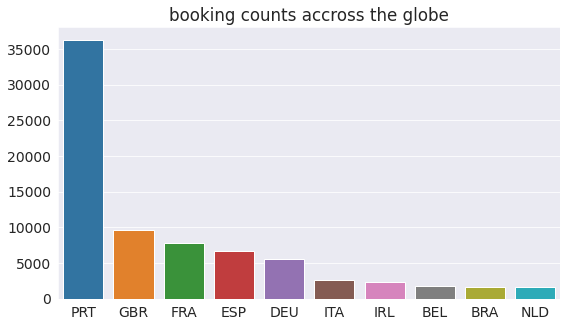

In [ ]:
sns.barplot (y= list(df.Country.value_counts().head (10)), x= list(df.Country.value_counts().head(10).index))
plt.title('booking counts accross the globe')
plt.show()

# **Visualizing proportion of booking cancellations vis a vis Type of Hotel bookings**

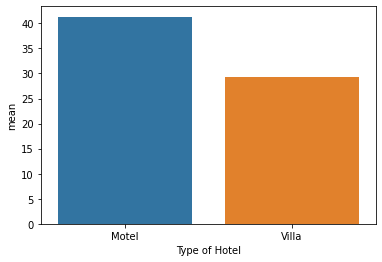

In [15]:
a = bookings_raw_df.groupby("Type of Hotel")['Cancellation'].describe()
sns.barplot(x=a.index,y=a["mean"]*100)

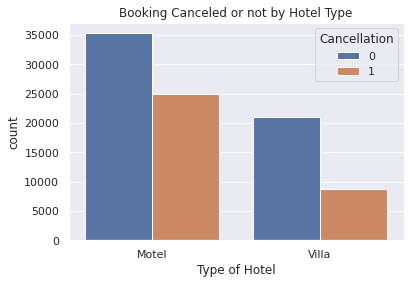

In [18]:
# another way of plotting same graph including hue as cancellation
sns.set(style = "darkgrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "Type of Hotel", hue = 'Cancellation', data = bookings_raw_df)


Inference : Around 40% bookings were cancelled in Motel  and 30% in villa.

**Plotting monthly cancellations and customer type**

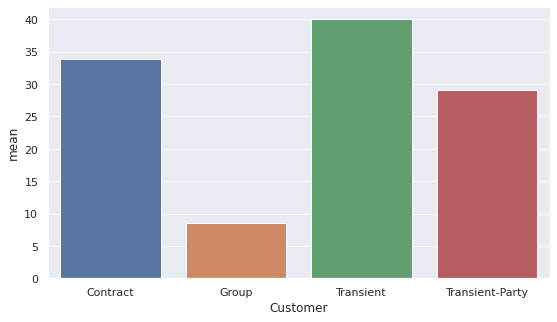

In [58]:
a = bookings_df.groupby("Customer")['Cancellation'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

# **Does Booking Type affects cancellation of customers?**

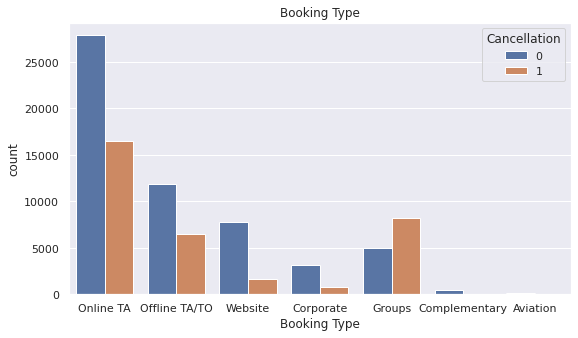

In [92]:
plt.title("Booking Type")
sns.countplot(x='Booking Type',data=bookings_df ,hue='Cancellation')

**Based on above derived inferences a monthly cancellation predictor is made based on various factors**

**References**

References: 1) https://stackoverflow.com 2) https://pandas.pydata.org 3) https://matplotlib.org 4)https://www.w3schools.com 4) https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e 5) https://monkeylearn.com/blog/data-cleaning-python/